In [1]:
# Instalar RDKit
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 23.1 MB/s eta 0:00:00


In [2]:
# Importamos las librerías necesarias
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from google.colab import files

In [3]:
# Cargar el archivo .csv desde tu ordenador
uploaded = files.upload()

Saving All_databases_INICIAL_Properties.csv to All_databases_INICIAL_Properties.csv


In [4]:
# Ignorar las líneas que no tienen el número esperado de campos
df = pd.read_csv('All_databases_INICIAL_Properties.csv', on_bad_lines='skip')

# Mostrar las primeras filas para verificar
df.head()

,ID,Structure of SMILES [idcode],SMILES,DB,Total Molweight,cLogP,H-Acceptors,H-Donors,Polar Surface Area,Rotatable Bonds
0,100NatUV,ff}AP@@TDfjTwOK{Jv|eGMAAET@QP@@@,COC1=CC(=CC(=C1O)OC)CCC2=CC(=C(C=C2)O)OC,Nat-UV,304.341,2.9596,5,2,68.15,6
1,101NatUV,ffcAP@@TdfnRJZJZJIZHphRkAcf``H@`Hh@@@,COC1=C(C(=C2C(=C1)C=CC3=C2C=CC(=C3OC)O)OC)O,Nat-UV,300.309,3.1470,5,2,68.15,3
2,102NatUv,flu@P@@DLgHhhhdeeBefRuXLViZjP@j@@@,COC1=CC(=O)C2=C(C1=O)CCC3=C2C=CC(=C3)O,Nat-UV,256.256,1.4520,4,1,63.60,1
3,103NatUV,fbu@P@@TBeJ[guYVW`oQhHBh@b`@@,COC1=C(C=C(C=C1)CCC2=CC(=CC(=C2)OC)O)O,Nat-UV,274.315,3.0296,4,2,58.92,5
4,104NatUV,fbm@P@@TegIEMEMEDmDRIU`qSPQDAQAD@@@,COC1=C(C(=C2C(=C1)CCC3=C2C=CC(=C3)O)OC)O,Nat-UV,272.299,2.9602,4,2,58.92,2


In [ ]:
# Función para obtener el scaffold Bemis-Murcko de una molécula a partir de su SMILES
def get_bemis_murcko_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        return Chem.MolToSmiles(scaffold)
    return None

# Crear una nueva columna con los scaffolds de Bemis-Murcko
df['Bemis-Murcko Scaffold'] = df['SMILES'].apply(get_bemis_murcko_scaffold)

# Mostrar el DataFrame con los scaffolds
df.head()


[03:32:39] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[03:32:39] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'


,ID,Structure of SMILES [idcode],SMILES,DB,Total Molweight,cLogP,H-Acceptors,H-Donors,Polar Surface Area,Rotatable Bonds,Bemis-Murcko Scaffold
0,100NatUV,ff}AP@@TDfjTwOK{Jv|eGMAAET@QP@@@,COC1=CC(=CC(=C1O)OC)CCC2=CC(=C(C=C2)O)OC,Nat-UV,304.341,2.9596,5,2,68.15,6,c1ccc(CCc2ccccc2)cc1
1,101NatUV,ffcAP@@TdfnRJZJZJIZHphRkAcf``H@`Hh@@@,COC1=C(C(=C2C(=C1)C=CC3=C2C=CC(=C3OC)O)OC)O,Nat-UV,300.309,3.1470,5,2,68.15,3,c1ccc2c(c1)ccc1ccccc12
2,102NatUv,flu@P@@DLgHhhhdeeBefRuXLViZjP@j@@@,COC1=CC(=O)C2=C(C1=O)CCC3=C2C=CC(=C3)O,Nat-UV,256.256,1.4520,4,1,63.60,1,O=C1C=CC(=O)C2=C1CCc1ccccc12
3,103NatUV,fbu@P@@TBeJ[guYVW`oQhHBh@b`@@,COC1=C(C=C(C=C1)CCC2=CC(=CC(=C2)OC)O)O,Nat-UV,274.315,3.0296,4,2,58.92,5,c1ccc(CCc2ccccc2)cc1
4,104NatUV,fbm@P@@TegIEMEMEDmDRIU`qSPQDAQAD@@@,COC1=C(C(=C2C(=C1)CCC3=C2C=CC(=C3)O)OC)O,Nat-UV,272.299,2.9602,4,2,58.92,2,c1ccc2c(c1)CCc1ccccc1-2


In [ ]:
# Filtrar las filas donde la columna "DB" tiene el valor "Nat-UV"
df_nat_uv = df[df['DB'] == 'Nat-UV']

# Remover filas que no tienen scaffold (None o NaN) en la columna "Bemis-Murcko Scaffold"
df_nat_uv = df_nat_uv[df_nat_uv['Bemis-Murcko Scaffold'].notnull()]

# Contar la frecuencia de los scaffolds en la columna "Bemis-Murcko Scaffold"
scaffold_counts = df_nat_uv['Bemis-Murcko Scaffold'].value_counts()

# Mostrar los scaffolds más frecuentes
scaffold_counts.head(25)

,count
Bemis-Murcko Scaffold,
,33
C=C1CCC2CCCCC2C1,9
O=C1C=CCCO1,8
O=c1cc(-c2ccccc2)oc2ccccc12,7
c1ccc([C@@H]2CCc3ccccc3O2)cc1,5
O=C1C=CC(Cc2ccccc2)=CC1,5
c1ccccc1,4
C=C1O[C@H]2CCC3=CC(=O)C(CC[C@H]2C1=C)O3,4
c1ccc(CCc2ccccc2)cc1,4


In [ ]:
!pip install upsetplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
from collections import defaultdict

/usr/local/lib/python3.10/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/python3.10/dist-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

<Figure size 1200x800 with 0 Axes>

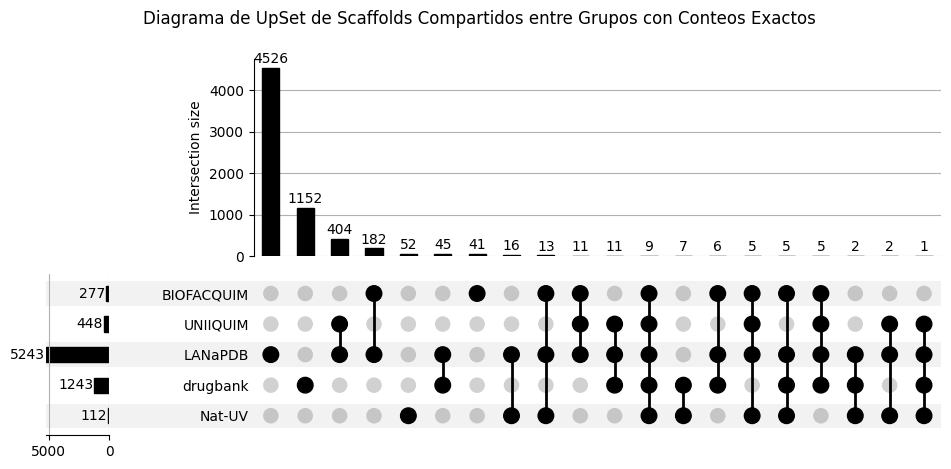

Lista de scaffolds únicos en el grupo 'Nat-UV':


['O=C1CCC2[C@@H](CC=C3C4CC[C@@H]([C@H]5CO[C@@H]([C@H]6CO6)C5)C4CC[C@@H]32)C1',
 'O=C1C=C(c2ccccc2)C(Cc2ccc3c(c2)CCO3)O1',
 'O=c1cc(-c2ccccc2)oc2ccc(C3CCCCO3)cc12',
 'O=C(C=Cc1ccccc1)OC[C@@H]1CC[C@H](C[C@H]2CC=CC(=O)O2)O1',
 'O=C1CCC2C(CCC3C4CCC5CCCC[C@H]5C4=CCC23)C1',
 'O=C1C=CCN1',
 'O=C1C=CC(Cc2ccccc2)=CC1',
 'C1CC[C@]2(C[C@@H]3CCC[C@@H]4NC[C@H]2C[C@H]34)NC1',
 'O=C1C=CC(Cc2cccc(CC3=CCC(=O)C=C3)c2)=CC1',
 'O=C1OCC(Cc2ccc3c(c2)CCCO3)=C1c1ccccc1',
 'O=C1OCC(Cc2ccccc2)=C1c1ccccc1',
 'C1[C@H]2C[C@H]3O[C@@H]1C[C@H]3N2',
 'C=C1C=C(c2ccccc2)C(Cc2ccc3c(c2)CCCO3)O1',
 'C=C1O[C@H]2CCC3=CC(=O)C(CC[C@H]2C1=C)O3',
 'C=C1CC2CC(C(=O)Cc3ccccc3)CCC2CC1C(=O)Cc1ccccc1',
 'O=C1C=CC(CC2=CCC(=O)C=C2)=CC1',
 'O=C1Nc2ccccc2[C@@]12CCN1C[C@H]3COC=C[C@H]3C[C@H]12',
 'C1=C2[C@@H]3CCCC3CC[C@@H]2C2CCCCC2C1',
 'O=C1/C=C/C[C@@H]2CCC[C@H]2/C=C/CCCCO1',
 'O=C1OCc2cc3cc4c(cc3c(-c3ccccc3)c21)OCO4',
 'C1=NCC=NC1',
 'C=C1C2CC=C[C@H]1Cc1[nH]c(=O)ccc12',
 'O=C1C=C(c2ccccc2)C(Cc2ccc3c(c2)CCCO3)O1',
 'O=C1OC[C@@H]2Cc3c(cc4c(

In [ ]:
# Crear un diccionario para almacenar los scaffolds por grupo
scaffolds_by_group = {}

# Obtener los scaffolds por grupo
for group in df['DB'].unique():
    scaffolds_by_group[group] = set(df[df['DB'] == group]['Bemis-Murcko Scaffold'].dropna())

# Crear una estructura para almacenar las intersecciones de cada combinación de grupos
intersections = defaultdict(int)

# Obtener todos los posibles scaffolds y su pertenencia a cada grupo
all_scaffolds = set()
for scaffolds in scaffolds_by_group.values():
    all_scaffolds.update(scaffolds)

# Crear una estructura de datos para saber en qué grupo(s) está cada scaffold
for scaffold in all_scaffolds:
    membership = tuple((scaffold in scaffolds_by_group[group]) for group in scaffolds_by_group.keys())
    intersections[membership] += 1

# Crear un DataFrame de las intersecciones
intersection_series = pd.Series(intersections)
intersection_series.index = pd.MultiIndex.from_tuples(intersection_series.index, names=scaffolds_by_group.keys())

# Graficar el UpSet plot
plt.figure(figsize=(12, 8))
upset = UpSet(intersection_series, show_counts=True, sort_by='cardinality', sort_categories_by=None)
upset.plot()
plt.suptitle("Diagrama de UpSet de Scaffolds Compartidos entre Grupos con Conteos Exactos")
plt.show()

# Obtener los scaffolds únicos del grupo "Nat-UV"
scaffolds_nat_uv = scaffolds_by_group.get("Nat-UV", set())

# Obtener todos los scaffolds de otros grupos
scaffolds_other_groups = set()
for group, scaffolds in scaffolds_by_group.items():
    if group != "Nat-UV":
        scaffolds_other_groups.update(scaffolds)

# Calcular los scaffolds que están solo en "Nat-UV"
unique_scaffolds_nat_uv = scaffolds_nat_uv - scaffolds_other_groups

# Convertir el conjunto a una lista
unique_scaffolds_list = list(unique_scaffolds_nat_uv)

# Mostrar la lista de scaffolds únicos del grupo "Nat-UV"
print("Lista de scaffolds únicos en el grupo 'Nat-UV':")
unique_scaffolds_list

In [6]:
import pandas as pd

# Supongamos que ya tienes tu DataFrame cargado como df
# y que la columna 'DB' indica a cuál grupo pertenece cada compuesto (NatUV o BIOFACQUIM)
# y la columna 'SMILES' contiene el SMILES de cada compuesto

# Filtramos los SMILES de los compuestos pertenecientes a cada grupo
natuv_smiles = set(df[df['DB'] == 'NatUV']['SMILES'])
biofacquim_smiles = set(df[df['DB'] == 'BIOFACQUIM']['SMILES'])

# Calculamos los compuestos idénticos entre ambos grupos
smiles_identicos = natuv_smiles.intersection(biofacquim_smiles)

# Contamos el número de compuestos idénticos
conteo_identicos = len(smiles_identicos)

print(f"Número de compuestos idénticos entre NatUV y BIOFACQUIM: {conteo_identicos}")


Número de compuestos idénticos entre NatUV y BIOFACQUIM: 0
